In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

## Analysis of the California Fire Incidents Dataset

### 1. Data Overview
- **Total Records (Entries):** 1,636
- **Total Variables (Columns):** 40
- **Dataset Type:** CSV file

### 2. Data Provenance
- **Source:** The dataset appears to be compiled from official fire department records, including CAL FIRE and other agencies (kagle : https://www.kaggle.com/datasets/ananthu017/california-wildfire-incidents-20132020)
- **Collection Method:** Likely aggregated from fire incident reports submitted by various firefighting units and government agencies.

### 3. Census or Sample?
- This dataset is **not a sample**; it seems to be a **census of fire incidents** within California, capturing all reported fires over a specified period.

### 4. Data Processing
- Some fields, such as **AcresBurned**, **Fatalities**, and **PersonnelInvolved**, appear to be numeric.
- Others, like **ConditionStatement** and **Status**, contain text descriptions.
- **Dates** are in an ISO 8601 format (e.g., `2013-08-17T15:25:00Z`).
- Some values are missing, indicating incomplete reporting.

### 5. Selection/Sampling Criteria
- The dataset includes **all reported incidents** rather than a sampled subset.
- Fires that meet a particular threshold (size, impact, or agency reporting) may be included.

### 6. Units and Sample Size
- **Unit of Analysis:** Each row represents an individual fire incident.
- **Sample Size (Total Fires Recorded):** 1,636 incidents.

### 7. Key Variables (40 total)
- **Fire Characteristics:** `AcresBurned`, `PercentContained`, `FuelType`
- **Location:** `Latitude`, `Longitude`, `Counties`
- **Response Details:** `Engines`, `AirTankers`, `Helicopters`, `CrewsInvolved`
- **Impact:** `Fatalities`, `Injuries`, `StructuresDamaged`, `StructuresDestroyed`
- **Dates:** `Started`, `Extinguished`, `Updated`
- **Incident Management:** `AdminUnit`, `MajorIncident`, `CalFireIncident`



## Fire Characteristics

### AcresBurned
**Description:** Total area burned in acres.

**Type:** Numerical (Continuous)

**Range:** 0 - 257,314 acres

### PercentContained
**Description:** Percentage of fire containment.

**Type:** Numerical (Continuous)

**Range:** 0 - 100%

### FuelType
**Description:** Type of fuel that contributed to the fire.

**Type:** Categorical

**Levels:** Grass, Brush, Timber, Mixed

## Location

### Latitude
**Description:** Geographic coordinate (latitude) of fire incident.

**Type:** Numerical (Continuous)

**Range:** -90 to 90

### Longitude
**Description:** Geographic coordinate (longitude) of fire incident.

**Type:** Numerical (Continuous)

**Range:** -180 to 180

### Counties
**Description:** County where the fire occurred.

**Type:** Categorical

**Levels:** Various California counties

## Response Details

### Engines
**Description:** Number of fire engines deployed.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### AirTankers
**Description:** Number of air tankers used.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### Helicopters
**Description:** Number of helicopters involved.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### CrewsInvolved
**Description:** Number of firefighting crews involved.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

## Impact

### Fatalities
**Description:** Number of reported fatalities due to the fire.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### Injuries
**Description:** Number of people injured due to the fire.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### StructuresDamaged
**Description:** Number of structures damaged.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

### StructuresDestroyed
**Description:** Number of structures completely destroyed.

**Type:** Numerical (Discrete)

**Values:** 0, 1, 2, ...

## Dates

### Started
**Description:** Date and time when the fire started.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

### Extinguished
**Description:** Date and time when the fire was fully extinguished.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

### Updated
**Description:** Last update timestamp of the fire record.

**Type:** DateTime

**Format:** ISO 8601 (YYYY-MM-DDTHH:MM:SSZ)

## Incident Management

### AdminUnit
**Description:** Fire management agency responsible for the fire.

**Type:** Categorical

**Levels:** Various fire management agencies

### MajorIncident
**Description:** Whether the fire was classified as a major incident.

**Type:** Boolean

**Levels:** True, False

### CalFireIncident
**Description:** Whether CAL FIRE was involved in managing the incident.

**Type:** Boolean

**Levels:** True, False



# Data description

In [72]:
df = pd.read_csv("California_Fire_Incidents.csv")

In [73]:
df.shape

(1636, 40)

In [74]:
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [75]:
df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [76]:
df.dtypes

AcresBurned             float64
Active                     bool
AdminUnit                object
AirTankers              float64
ArchiveYear               int64
CalFireIncident            bool
CanonicalUrl             object
ConditionStatement       object
ControlStatement         object
Counties                 object
CountyIds                object
CrewsInvolved           float64
Dozers                  float64
Engines                 float64
Extinguished             object
Fatalities              float64
Featured                   bool
Final                      bool
FuelType                 object
Helicopters             float64
Injuries                float64
Latitude                float64
Location                 object
Longitude               float64
MajorIncident              bool
Name                     object
PercentContained        float64
PersonnelInvolved       float64
Public                     bool
SearchDescription        object
SearchKeywords           object
Started 

In [77]:
df.describe()

,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


In [78]:
df.info

<bound method DataFrame.info of       AcresBurned  Active                                          AdminUnit  \
0        257314.0   False  Stanislaus National Forest/Yosemite National Park   
1         30274.0   False  USFS Angeles National Forest/Los Angeles Count...   
2         27531.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
3         27440.0   False                              Tahoe National Forest   
4         24251.0   False                       Ventura County Fire/CAL FIRE   
...           ...     ...                                                ...   
1631          9.0   False                   CAL FIRE / Riverside County Fire   
1632          2.0   False                  CAL FIRE Nevada-Yuba-Placer Unit    
1633          NaN   False               Yolo County Fire Protection District   
1634          NaN   False                   Camp Pendleton Marine Corps Base   
1635          NaN   False                           Bureau of Indian Affairs   

      A

## Checking missing values

### Calculate percentage of missing values

In [79]:
perc = round(df.isnull().sum() / len(df), 2) * 100

### Filter and display columns with missing values


In [80]:
print("\nPercentage of missing values:")
missing_columns = perc[perc > 0]
print(missing_columns)


Percentage of missing values:
AirTankers               98.0
ConditionStatement       83.0
ControlStatement         94.0
CrewsInvolved            90.0
Dozers                   92.0
Engines                  88.0
Extinguished              4.0
Fatalities               99.0
FuelType                 99.0
Helicopters              95.0
Injuries                 93.0
PersonnelInvolved        88.0
SearchDescription         1.0
SearchKeywords           12.0
StructuresDamaged        96.0
StructuresDestroyed      89.0
StructuresEvacuated     100.0
StructuresThreatened     98.0
WaterTenders             91.0
dtype: float64


### Display columns with more than 50% missing values


In [81]:
deleting_columns = perc[perc > 50]
print(deleting_columns.index)

Index(['AirTankers', 'ConditionStatement', 'ControlStatement', 'CrewsInvolved',
       'Dozers', 'Engines', 'Fatalities', 'FuelType', 'Helicopters',
       'Injuries', 'PersonnelInvolved', 'StructuresDamaged',
       'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened',
       'WaterTenders'],
      dtype='object')


### Drop columns with more than 50% missing values

In [82]:
fire = df.drop(columns=deleting_columns.index)


### Check that everything we want is deleted

In [83]:
print("\nMissing values per column:")
perc = round(fire.isnull().sum() / len(df), 2) * 100
print(perc)


Missing values per column:
AcresBurned           0.0
Active                0.0
AdminUnit             0.0
ArchiveYear           0.0
CalFireIncident       0.0
CanonicalUrl          0.0
Counties              0.0
CountyIds             0.0
Extinguished          4.0
Featured              0.0
Final                 0.0
Latitude              0.0
Location              0.0
Longitude             0.0
MajorIncident         0.0
Name                  0.0
PercentContained      0.0
Public                0.0
SearchDescription     1.0
SearchKeywords       12.0
Started               0.0
Status                0.0
UniqueId              0.0
Updated               0.0
dtype: float64


### Impute moderate missing value columns


In [84]:
fire['SearchKeywords'] = fire['SearchKeywords'].fillna("Unknown")

### Impute low missing value columns

In [85]:
fire['Extinguished'] = fire['Extinguished'].fillna("Unknown")
fire['SearchDescription'] = fire['SearchDescription'].fillna("Unknown")

### Check that all data is clean

In [86]:
print("\nMissing values per column:")
perc = round(fire.isnull().sum() / len(df), 2) * 100
print(perc)


Missing values per column:
AcresBurned          0.0
Active               0.0
AdminUnit            0.0
ArchiveYear          0.0
CalFireIncident      0.0
CanonicalUrl         0.0
Counties             0.0
CountyIds            0.0
Extinguished         0.0
Featured             0.0
Final                0.0
Latitude             0.0
Location             0.0
Longitude            0.0
MajorIncident        0.0
Name                 0.0
PercentContained     0.0
Public               0.0
SearchDescription    0.0
SearchKeywords       0.0
Started              0.0
Status               0.0
UniqueId             0.0
Updated              0.0
dtype: float64


### Convert date columns to datetime

In [87]:
fire['Extinguished'] = pd.to_datetime(fire['Extinguished'], errors='coerce')
fire['Started'] = pd.to_datetime(fire['Started'], errors='coerce')
fire['Updated'] = pd.to_datetime(fire['Updated'], errors='coerce')

# Geospatial plot

### Convert latitude and longitude into Point geometries

### Assign colors based on the activity


### Identifying erroneous values

In [88]:
print(fire['Longitude'].describe())
print(fire['Latitude'].describe())

count    1636.000000
mean     -108.082642
std        37.006927
min      -124.196290
25%      -121.768358
50%      -120.461560
75%      -117.474073
max       118.908200
Name: Longitude, dtype: float64
count    1636.000000
mean       37.203975
std       135.401380
min      -120.258000
25%        34.165891
50%        37.104065
75%        39.086808
max      5487.000000
Name: Latitude, dtype: float64


### Delete or modify wrong values

In [89]:
fire = fire[(fire['Latitude'] > 29) & (fire['Latitude'] < 42 )]
fire = fire[ fire['Longitude'] < -115 ]

### Plot


In [90]:
fire['geometry'] = [Point(xy) for xy in zip(fire['Longitude'], fire['Latitude'])]
gdf = gpd.GeoDataFrame(fire, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)


In [91]:
gdf['color'] = gdf['Active'].apply(lambda p: 'red' if True else 'grey')

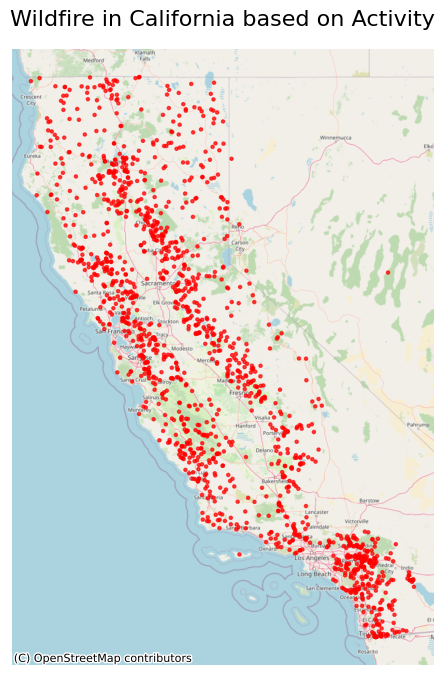

In [92]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Wildfire in California based on Activity", fontsize=16)
ax.set_axis_off()
plt.show()
